In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

import acquire as ac
import prepare as pr

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
# def clean_total_charges(df):
#     """
#     This functions takes in the telco DataFrame, and returns a DataFrame where NaN values have been dropped and
#     the total_charges variable is converted to a float type.
#     """
#     # total_charges is an object, needs to be a float. start by removing leading and trailing whitespace.
#     df.total_charges = df.total_charges.str.strip()
#     # replace blank strings with NaN value inplace of the existing DataFrame
#     df.replace("", np.nan, inplace=True)
#     # drop rows with NaN values inplace of the existing DataFrame
#     df.dropna(inplace=True)
#     # assigning the total charges field as a float
#     df["total_charges"] = df.total_charges.astype("float")
#     # resetting index inplace of existing DataFrame
#     df.reset_index(inplace=True)
#     # drop index column
#     df.drop(columns="index", inplace=True)
#     return df

In [4]:
# def consolidate_columns(df):
#     df["phone_service_type"] = np.where(df.multiple_lines == "No", "Single line", np.where(df.multiple_lines == "Yes", "Multiple lines", "None"))
#     df["family"] = np.where((df.partner == "Yes") & (df.dependents == "Yes"), "Partner and dependents", np.where((df.partner == "Yes") & (df.dependents == "No"), "Partner", np.where((df.partner == "No") & (df.dependents == "Yes"), "Dependents", "Single")))
#     df["streaming"] = np.where((df.streaming_tv == "Yes") & (df.streaming_movies == "Yes"), "TV and movies", np.where((df.streaming_tv == "Yes") & (df.streaming_movies == "No"), "TV", np.where((df.streaming_tv == "No") & (df.streaming_movies == "Yes"), "Movies", np.where((df.streaming_tv == "No") & (df.streaming_movies == "No"), "None", "No internet service"))))
#     df["online_protection"] = np.where((df.online_security == "Yes") & (df.online_backup == "Yes"), "Security and backup", np.where((df.online_security == "Yes") & (df.online_backup == "No"), "Security", np.where((df.online_security == "No") & (df.online_backup == "Yes"), "Backup", np.where((df.online_security == "No") & (df.online_backup == "No"), "None", "No internet service"))))
#     df.drop(columns=["phone_service", "multiple_lines", "partner", "dependents", "streaming_tv", "streaming_movies", "online_security", "online_backup"], inplace=True)
#     return df
    

In [5]:
# def prep_telco(df):
    
#     # clean total_charges
#     df = clean_total_charges(df)
    
#     # removing unnecessary variables
#     # df.drop(columns=[], inplace=True)
    
    
    
#     # splitting df into train and test
#     train, test = train_test_split(df, random_state=56, train_size=.8)
    
#     # splitting train into train and validate
#     train, validate = train_test_split(train, random_state=56, train_size=.75)
    
#     return train, validate, test

---
# Prepare

In [6]:
df = ac.get_telco_data()
print(df.shape)
df.head()

(7043, 24)


,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,internet_service_type,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,contract_type,paperless_billing,payment_type_id,payment_type,monthly_charges,total_charges,churn
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,DSL,No,No,No,No,No,Yes,1,Month-to-month,No,2,Mailed check,59.9,542.4,No
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,DSL,No,No,No,Yes,Yes,Yes,1,Month-to-month,Yes,4,Credit card (automatic),69.4,571.45,No
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,DSL,Yes,No,No,No,No,No,1,Month-to-month,Yes,1,Electronic check,48.2,340.35,No
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,DSL,No,No,No,No,No,No,1,Month-to-month,Yes,1,Electronic check,25.1,25.1,Yes
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,DSL,Yes,No,No,No,No,No,1,Month-to-month,No,3,Bank transfer (automatic),30.5,30.5,Yes


In [7]:
df.describe()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,1.872923,1.690473,2.315633,64.761692
std,0.368612,24.559481,0.737796,0.833755,1.148907,30.090047
min,0.000000,0.000000,1.000000,1.000000,1.000000,18.250000
25%,0.000000,9.000000,1.000000,1.000000,1.000000,35.500000
50%,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000
75%,0.000000,55.000000,2.000000,2.000000,3.000000,89.850000
max,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
customer_id                 7043 non-null object
gender                      7043 non-null object
senior_citizen              7043 non-null int64
partner                     7043 non-null object
dependents                  7043 non-null object
tenure                      7043 non-null int64
phone_service               7043 non-null object
multiple_lines              7043 non-null object
internet_service_type_id    7043 non-null int64
internet_service_type       7043 non-null object
online_security             7043 non-null object
online_backup               7043 non-null object
device_protection           7043 non-null object
tech_support                7043 non-null object
streaming_tv                7043 non-null object
streaming_movies            7043 non-null object
contract_type_id            7043 non-null int64
contract_type               7043 non-null object
paperless_billi

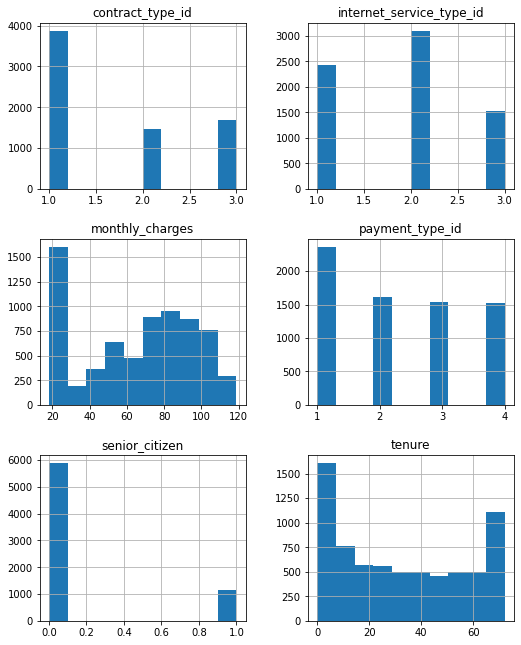

In [9]:
df.hist(figsize=(8.5, 11))
plt.show()

In [10]:
# train["phone_service_type"] = np.where(train.multiple_lines == "No", "Single line", np.where(train.multiple_lines == "Yes", "Multiple lines", "None"))
# train["family"] = np.where((train.partner == "Yes") & (train.dependents == "Yes"), "Partner and dependents", np.where((train.partner == "Yes") & (train.dependents == "No"), "Partner", np.where((train.partner == "No") & (train.dependents == "Yes"), "Dependents", "Single")))
# train["streaming"] = np.where((train.streaming_tv == "Yes") & (train.streaming_movies == "Yes"), "TV and movies", np.where((train.streaming_tv == "Yes") & (train.streaming_movies == "No"), "TV", np.where((train.streaming_tv == "No") & (train.streaming_movies == "Yes"), "Movies", np.where((train.streaming_tv == "No") & (train.streaming_movies == "No"), "None", "No internet service"))))
# train["online_protection"] = np.where((train.online_security == "Yes") & (train.online_backup == "Yes"), "Security and backup", np.where((train.online_security == "Yes") & (train.online_backup == "No"), "Security", np.where((train.online_security == "No") & (train.online_backup == "Yes"), "Backup", np.where((train.online_security == "No") & (train.online_backup == "No"), "None", "No internet service"))))

In [11]:
# train.drop(columns=["phone_service", "multiple_lines", "partner", "dependents", "streaming_tv", "streaming_movies", "online_security", "online_backup"], inplace=True)

---
# Testing Functions

In [12]:
df = ac.get_telco_data()

In [13]:
pd.crosstab(df["phone_service"], df["multiple_lines"])

multiple_lines,No,No phone service,Yes
phone_service,,,
No,0,682,0
Yes,3390,0,2971


In [14]:
train, validate, test = pr.prep_telco(df)
print(train.shape)
print(validate.shape)
print(test.shape)

(4218, 21)
(1407, 20)
(1407, 20)


In [15]:
train.sample(50)

,customer_id,gender,senior_citizen,tenure,internet_service_type_id,internet_service_type,device_protection,tech_support,contract_type_id,contract_type,paperless_billing,payment_type_id,payment_type,monthly_charges,total_charges,churn,phone_service_type,family,streaming,online_protection,tenure_years
2032,3750-CKVKH,Male,0,2,2,Fiber optic,No,No,1,Month-to-month,Yes,1,Electronic check,67.75,116.65,Yes,Single line,Single,None,None,0.0
5209,6188-UXBBR,Female,0,38,3,None,No internet service,No internet service,2,One year,Yes,4,Credit card (automatic),20.25,814.75,No,Single line,Partner,No internet service,No internet service,3.0
832,6743-HHQPF,Male,0,42,1,DSL,No,No,1,Month-to-month,Yes,4,Credit card (automatic),25.10,1097.15,No,None,Partner,None,None,4.0
2638,6502-HCJTI,Male,1,7,2,Fiber optic,No,No,1,Month-to-month,Yes,4,Credit card (automatic),94.70,673.10,Yes,Multiple lines,Partner,Movies,Security and backup,1.0
1229,0027-KWYKW,Female,0,23,2,Fiber optic,No,No,1,Month-to-month,Yes,1,Electronic check,83.75,1849.95,No,Multiple lines,Partner and dependents,TV,None,2.0
3854,9546-KDTRB,Female,0,19,3,None,No internet service,No internet service,1,Month-to-month,No,3,Bank transfer (automatic),24.70,465.85,No,Multiple lines,Single,No internet service,No internet service,2.0
2632,6458-CYIDZ,Female,1,5,2,Fiber optic,No,No,1,Month-to-month,No,1,Electronic check,80.70,374.80,No,Single line,Single,None,Security and backup,0.0
1222,9992-UJOEL,Male,0,2,1,DSL,No,No,1,Month-to-month,Yes,2,Mailed check,50.30,92.75,No,Single line,Single,None,Backup,0.0
1339,0515-YPMCW,Male,0,1,2,Fiber optic,No,No,1,Month-to-month,Yes,2,Mailed check,70.45,70.45,Yes,Single line,Dependents,None,None,0.0
6933,8388-DMKAE,Female,0,8,3,None,No internet service,No internet service,3,Two year,No,2,Mailed check,20.25,174.65,No,Single line,Single,No internet service,No internet service,1.0
